In [1]:
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
X = np.matrix([[1], [2], [3], [4], [5]])
y = np.matrix([[0], [3], [2], [4.5], [8]])

# If features were not standardized, we have to add ones as a first column to data matrix
X = np.c_[np.ones(X.shape[0]), X]

## Locally weighted linear regression

Linear regression usually underfits the data.

$\hat{w} = (X^{T}WX)^{-1}X^{T}Wy$

$W$ is matrix (kernel) for weighing data points

**Gaussian kernel**

$w(i,i) = exp(\frac{|x^{i}-x|}{-2k^2})$

In [3]:
# Inspired by book Machine Learning in Action, Peter Harrington
def gaussian(X, k=1.0):
    return np.asscalar(np.exp(X*X.T / (-2.0*k**2)))

def create_kernel(X, X_i):
    """
    X    data matrix
    X_i  data point
    """
    def apply_kernel(X_j):
        diff_mat = X_j - X_i
        return gaussian(diff_mat)
    
    w = np.apply_along_axis(apply_kernel, axis=1, arr=X)

    return np.diag(w)
    
def lwlr(X, y, X_i):
    """
    Compute locally weighted linear regression.
    X_i  data point
    X    data matrix
    y    labels
    """
    W = create_kernel(X, X_i)

    WtWX = X.T * W * X
    
    # matrix must be non-singular
    assert(np.linalg.det(WtWX) != 0.0)
    
    W_hat = WtWX.I * X.T * W * y
    
    return X_i * W_hat

def test_lwlr(X, y, X_test):
    """
    Predict
    X       data matrix
    y       labels
    X_test  test data matrix 
    """
    def lwlr_apply(row):
        return np.asscalar(lwlr(X, y, row))
        
    y_hat = np.apply_along_axis(lwlr_apply, axis=1, arr=X_test)
    
    return np.array(y_hat)

In [4]:
y_hat = test_lwlr(X, y, X)

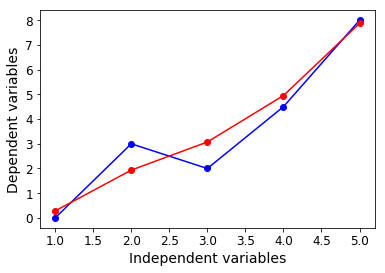

In [5]:
srt_idx = X[:, 1].argsort(0)
x_sort  = X[srt_idx][:, 0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y,  marker='o', linestyle='-', color='b')
ax.plot(x_sort[:, 1], y_hat[srt_idx],  marker='o', linestyle='-', color='r')
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')

In [6]:
np.corrcoef(np.transpose(y), np.transpose(y_hat))

array([[ 1.       ,  0.9645694],
       [ 0.9645694,  1.       ]])